<a href="https://colab.research.google.com/github/Angel-GS/Challenge_TelecomX_Analisis_Evasion_Clientes_Parte2/blob/main/Telecom_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:

# Data set creation and initial exploration
df = pd.read_csv("/content/datos_tratados.csv")
df.head()


,customer_id,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,daily_accounts
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [5]:


# Eliminar columnas no útiles
columnas_a_eliminar = ['customer_id', 'daily_accounts']
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

# Opcional: Eliminar account_charges_total si es redundante
if 'account_charges_total' in df.columns:
    df = df.drop('account_charges_total', axis=1)

# Verificar si phone_phoneservice es constante
if df['phone_phoneservice'].nunique() == 1:
    df = df.drop('phone_phoneservice', axis=1)

df.head()

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly
0,0.0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6
1,0.0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9


# Encoding
- Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:

In [6]:
# Identificar columnas categóricas (excluyendo binarias ya numéricas)
categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encoding
df_encoded = pd.get_dummies(df,
                          columns=categoricas,
                          drop_first=True,  # Reduce dimensionalidad
                          dtype=int)       # Optimiza memoria

# Verificar resultado
print(df_encoded.head(3))

   churn  customer_seniorcitizen  customer_partner  customer_dependents  \
0    0.0                       0                 1                    1   
1    0.0                       0                 0                    0   
2    1.0                       0                 0                    0   

   customer_tenure  phone_phoneservice  account_paperlessbilling  \
0                9                   1                         1   
1                9                   1                         0   
2                4                   1                         1   

   account_charges_monthly  customer_gender_Male  phone_multiplelines_1  ...  \
0                     65.6                     0                      0  ...   
1                     59.9                     1                      1  ...   
2                     73.9                     1                      0  ...   

   internet_techsupport_No internet service  internet_streamingtv_1  \
0                                 

# Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:

Distribución de churn (%):
churn
0.0    73.46
1.0    26.54
Name: proportion, dtype: float64


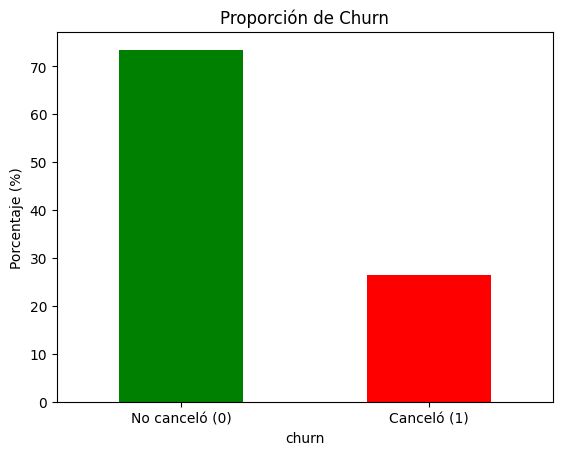

In [7]:
# Calcular proporción de churn (0 = No canceló, 1 = Canceló)
proporcion_churn = df_encoded['churn'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Distribución de churn (%):")
print(proporcion_churn.round(2))

# Gráfico de barras
import matplotlib.pyplot as plt
proporcion_churn.plot(kind='bar', color=['green', 'red'])
plt.title('Proporción de Churn')
plt.ylabel('Porcentaje (%)')
plt.xticks([0, 1], ['No canceló (0)', 'Canceló (1)'], rotation=0)
plt.show()

# Balanceo de Clases (opcional)
Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia:
Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo:

In [17]:
# Verificar valores faltantes en 'churn'
print("Valores faltantes en 'churn':", df_encoded['churn'].isna().sum())

# Opción 1: Eliminar filas con NaN en 'churn' (recomendado si son pocas)
df_clean = df_encoded.dropna(subset=['churn'])

# Opción 2: Imputar valores (solo si hay lógica de negocio para hacerlo)
# df_encoded['churn'] = df_encoded['churn'].fillna(0)  # Asumir que no cancelaron

Valores faltantes en 'churn': 224


In [11]:
# Asegurar que 'churn' es numérico
df_clean['churn'] = df_clean['churn'].astype(int)  # Convertir a entero

# Verificar valores únicos
print("Valores únicos en 'churn':", df_clean['churn'].unique())

Valores únicos en 'churn': [0 1]


/tmp/ipython-input-4136796220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['churn'] = df_clean['churn'].astype(int)  # Convertir a entero


In [18]:
# Eliminar filas con churn faltante (3.2% es aceptable descartar)
df_clean = df_encoded.dropna(subset=['churn'])

# Verificar nuevo conteo
print(f"Registros originales: {len(df_encoded)}")
print(f"Registros limpios: {len(df_clean)}")
print(f"Porcentaje descartado: {224/len(df_encoded)*100:.2f}%")

Registros originales: 7267
Registros limpios: 7043
Porcentaje descartado: 3.08%


Distribución después de SMOTE:
churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


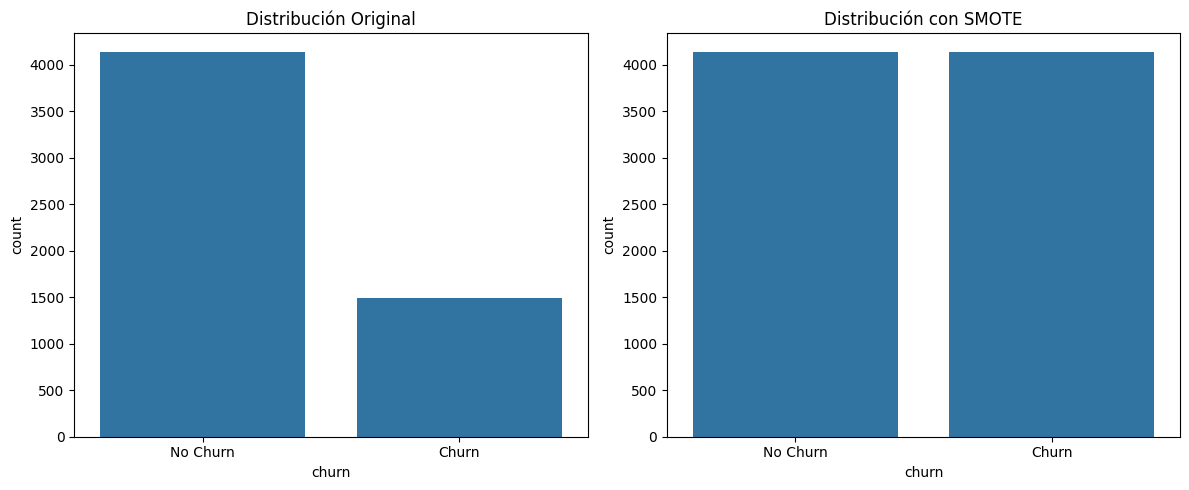

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separar características (X) y variable objetivo (y)
X = df_clean.drop('churn', axis=1)
y = df_clean['churn']

# Dividir en train y test ANTES de aplicar SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar el nuevo balance
print("Distribución después de SMOTE:")
print(y_train_smote.value_counts(normalize=True).round(2))

import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Antes
sns.countplot(x=y_train, ax=ax1)
ax1.set_title('Distribución Original')
ax1.set_xticks([0, 1], ['No Churn', 'Churn'])

# Después
sns.countplot(x=y_train_smote, ax=ax2)
ax2.set_title('Distribución con SMOTE')
ax2.set_xticks([0, 1], ['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

# Correlación de variables


Correlación con Churn (ordenado por importancia):
churn                                            1.000000
internet_internetservice_Fiber optic             0.308020
account_paymentmethod_Electronic check           0.301919
account_charges_monthly                          0.193356
account_paperlessbilling                         0.191825
customer_seniorcitizen                           0.150889
internet_streamingtv_1                           0.063228
internet_streamingmovies_1                       0.061382
phone_multiplelines_1                            0.040102
phone_phoneservice                               0.011942
customer_gender_Male                            -0.008612
phone_multiplelines_No phone service            -0.011942
internet_deviceprotection_1                     -0.066160
internet_onlinebackup_1                         -0.082255
account_paymentmethod_Mailed check              -0.091683
internet_internetservice_DSL                    -0.124214
account_paymentmethod

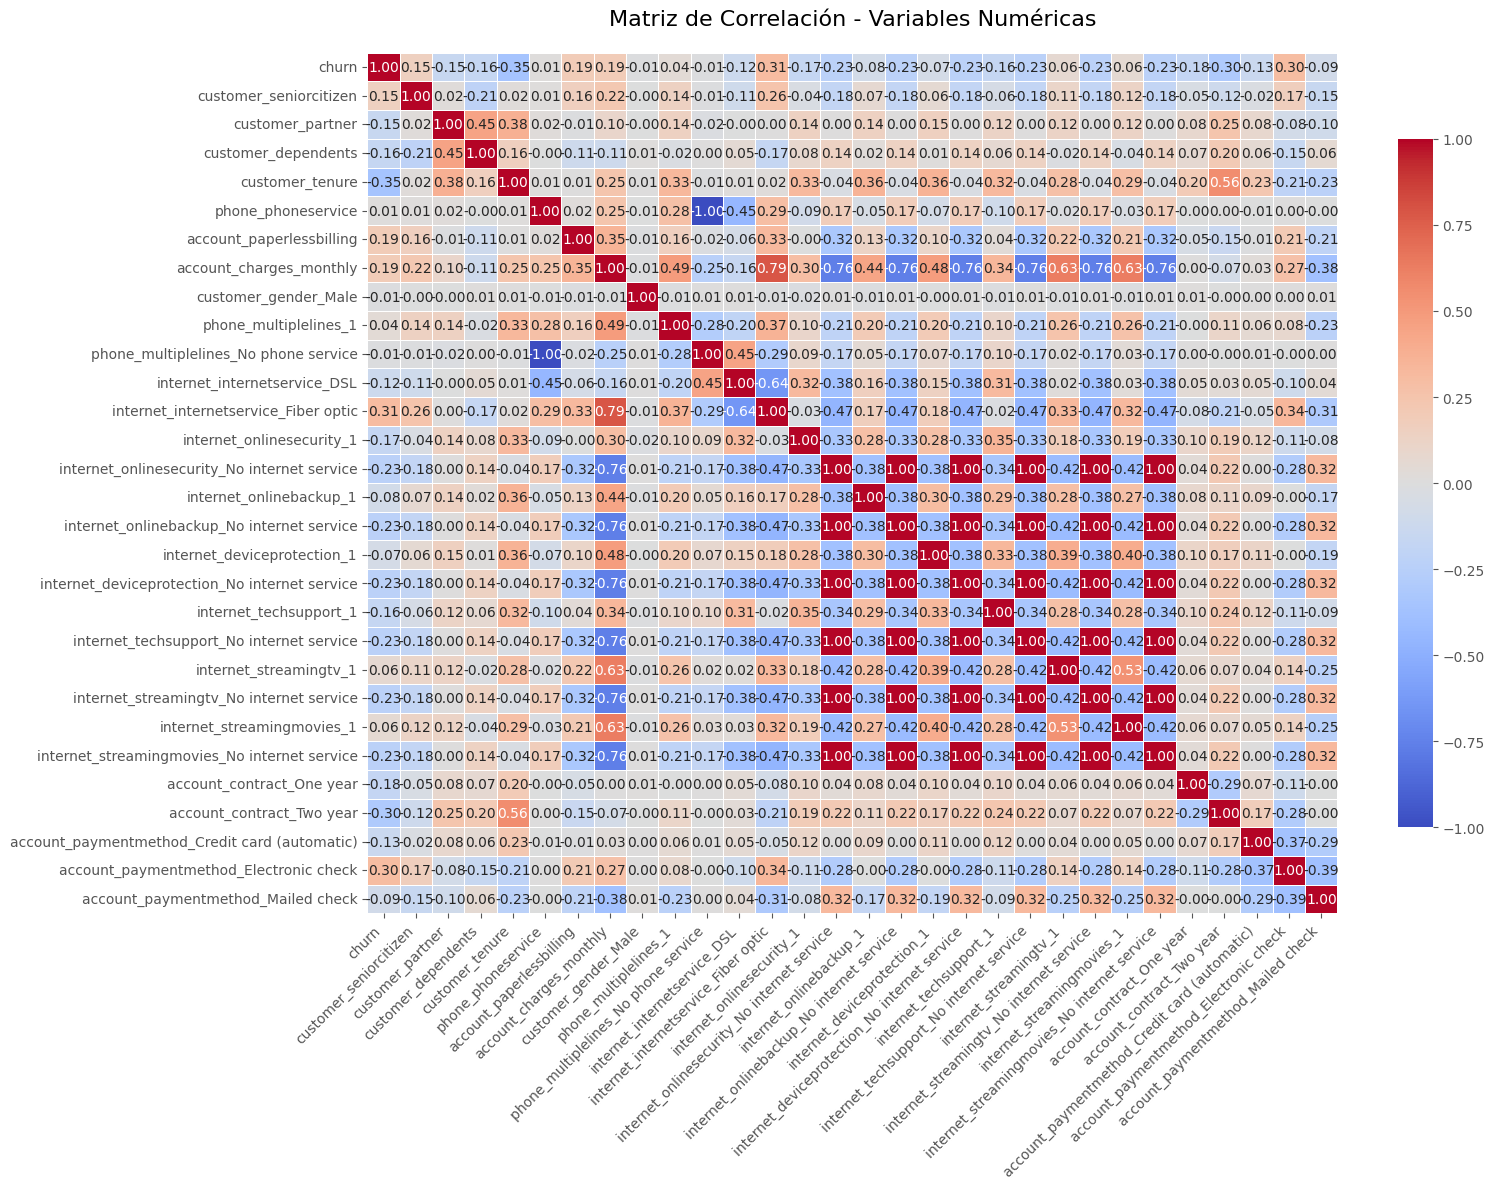

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual
plt.figure(figsize=(16, 12))
plt.style.use('ggplot')

# Calcular matriz de correlación (solo variables numéricas)
correlation_matrix = df_clean.select_dtypes(include=['int64','float64']).corr()

# Crear máscara para mostrar solo la mitad inferior
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap personalizado
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

# Ajustes estéticos
plt.title("Matriz de Correlación - Variables Numéricas", pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Destacar especialmente las correlaciones con churn
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)
print("\nCorrelación con Churn (ordenado por importancia):")
print(churn_correlations.to_string())
plt.show()

In [26]:
# 1. Verificar las columnas disponibles
print("Columnas disponibles en df_clean:")
print(df_clean.columns.tolist())

Columnas disponibles en df_clean:
['churn', 'customer_seniorcitizen', 'customer_partner', 'customer_dependents', 'customer_tenure', 'phone_phoneservice', 'account_paperlessbilling', 'account_charges_monthly', 'customer_gender_Male', 'phone_multiplelines_1', 'phone_multiplelines_No phone service', 'internet_internetservice_DSL', 'internet_internetservice_Fiber optic', 'internet_onlinesecurity_1', 'internet_onlinesecurity_No internet service', 'internet_onlinebackup_1', 'internet_onlinebackup_No internet service', 'internet_deviceprotection_1', 'internet_deviceprotection_No internet service', 'internet_techsupport_1', 'internet_techsupport_No internet service', 'internet_streamingtv_1', 'internet_streamingtv_No internet service', 'internet_streamingmovies_1', 'internet_streamingmovies_No internet service', 'account_contract_One year', 'account_contract_Two year', 'account_paymentmethod_Credit card (automatic)', 'account_paymentmethod_Electronic check', 'account_paymentmethod_Mailed check

/tmp/ipython-input-926093300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['contract_type'] = 'Month-to-month'  # Valor por defecto (cuando las otras dos son 0)


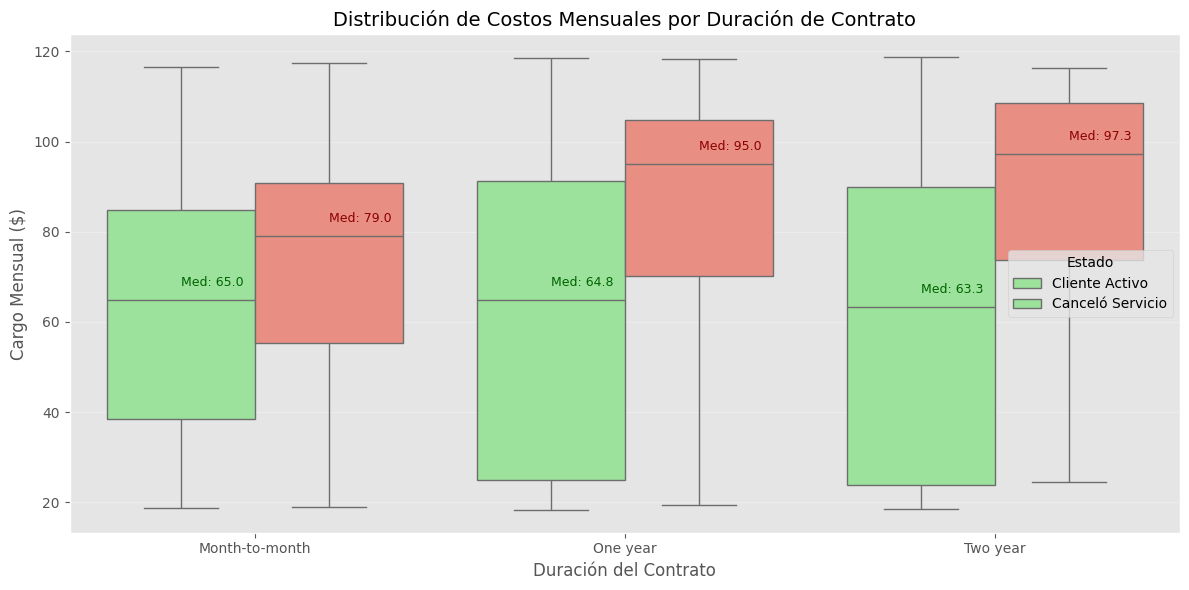

In [27]:
# Crear una columna temporal combinando las dummies
df_clean['contract_type'] = 'Month-to-month'  # Valor por defecto (cuando las otras dos son 0)
df_clean.loc[df_clean['account_contract_One year'] == 1, 'contract_type'] = 'One year'
df_clean.loc[df_clean['account_contract_Two year'] == 1, 'contract_type'] = 'Two year'

# Ordenar los contratos lógicamente para el gráfico
contract_order = ['Month-to-month', 'One year', 'Two year']

# Gráfico corregido
plt.figure(figsize=(12, 6))
sns.boxplot(x='contract_type', y='account_charges_monthly', hue='churn',
           data=df_clean, palette={0: "lightgreen", 1: "salmon"},
           showfliers=False, order=contract_order)

# Personalización del gráfico
plt.title('Distribución de Costos Mensuales por Duración de Contrato', fontsize=14)
plt.xlabel('Duración del Contrato', fontsize=12)
plt.ylabel('Cargo Mensual ($)', fontsize=12)
plt.legend(title='Estado', labels=['Cliente Activo', 'Canceló Servicio'])
plt.grid(axis='y', alpha=0.3)

# Añadir anotaciones estadísticas
medians = df_clean.groupby(['contract_type', 'churn'])['account_charges_monthly'].median()
for i, contract in enumerate(contract_order):
    for j, churn_status in enumerate([0, 1]):
        median_val = medians.loc[(contract, churn_status)]
        plt.text(i-0.2+j*0.4, median_val+3, f'Med: {median_val:.1f}',
                fontsize=9, color='darkred' if churn_status else 'darkgreen')

plt.tight_layout()
plt.show()

# bVisualización Corregida: Gasto Total vs Cargo Mensual

/tmp/ipython-input-2030375536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['estimated_total_charges'] = df_clean['account_charges_monthly'] * df_clean['customer_tenure']
/tmp/ipython-input-2030375536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['contract_type'] = 'Month-to-month'  # Valor por defecto


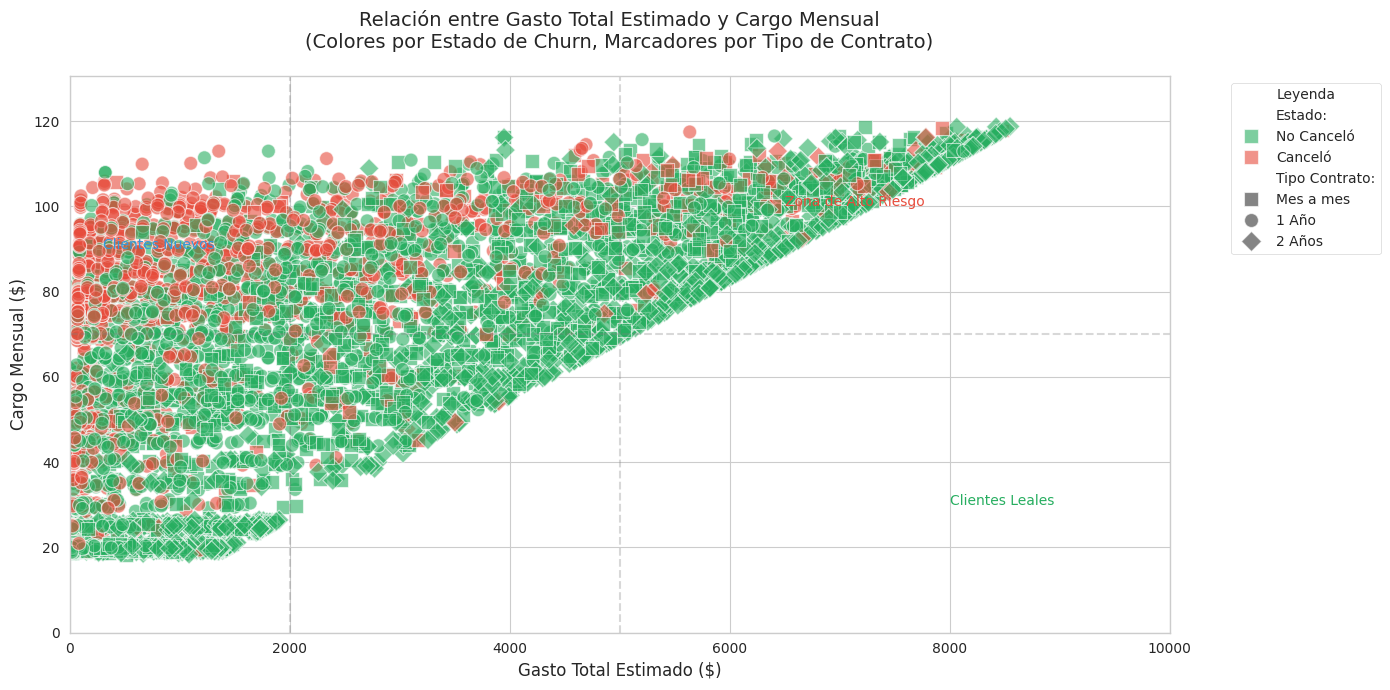

In [28]:
# Crear variable de gasto total estimado (cargo mensual × antigüedad)
df_clean['estimated_total_charges'] = df_clean['account_charges_monthly'] * df_clean['customer_tenure']

# Crear columna combinada para el tipo de contrato (usando las dummies existentes)
df_clean['contract_type'] = 'Month-to-month'  # Valor por defecto
df_clean.loc[df_clean['account_contract_One year'] == 1, 'contract_type'] = 'One year'
df_clean.loc[df_clean['account_contract_Two year'] == 1, 'contract_type'] = 'Two year'

# Configurar el estilo
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Crear el scatter plot corregido
scatter = sns.scatterplot(
    x='estimated_total_charges',
    y='account_charges_monthly',
    hue='churn',
    style='contract_type',
    data=df_clean,
    palette={0: "#27ae60", 1: "#e74c3c"},  # Verde para no-churn, rojo para churn
    alpha=0.6,
    s=100,
    markers={'Month-to-month': 'o', 'One year': 's', 'Two year': 'D'}
)

# Personalización del gráfico
plt.title('Relación entre Gasto Total Estimado y Cargo Mensual\n(Colores por Estado de Churn, Marcadores por Tipo de Contrato)',
          fontsize=14, pad=20)
plt.xlabel('Gasto Total Estimado ($)', fontsize=12)
plt.ylabel('Cargo Mensual ($)', fontsize=12)
plt.xlim(0, 10000)
plt.ylim(0, df_clean['account_charges_monthly'].max()*1.1)

# Leyenda mejorada
legend = plt.legend(
    title='Leyenda',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True
)
legend.get_texts()[0].set_text("Estado:")
legend.get_texts()[1].set_text("No Canceló")
legend.get_texts()[2].set_text("Canceló")
legend.get_texts()[3].set_text("Tipo Contrato:")
legend.get_texts()[4].set_text("Mes a mes")
legend.get_texts()[5].set_text("1 Año")
legend.get_texts()[6].set_text("2 Años")

# Añadir líneas de referencia
plt.axvline(2000, color='gray', linestyle='--', alpha=0.3)
plt.axvline(5000, color='gray', linestyle='--', alpha=0.3)
plt.axhline(70, color='gray', linestyle='--', alpha=0.3)

# Añadir anotaciones
plt.text(6500, 100, "Zona de Alto Riesgo", fontsize=10, color='#e74c3c')
plt.text(300, 90, "Clientes Nuevos", fontsize=10, color='#3498db')
plt.text(8000, 30, "Clientes Leales", fontsize=10, color='#27ae60')

plt.tight_layout()
plt.show()

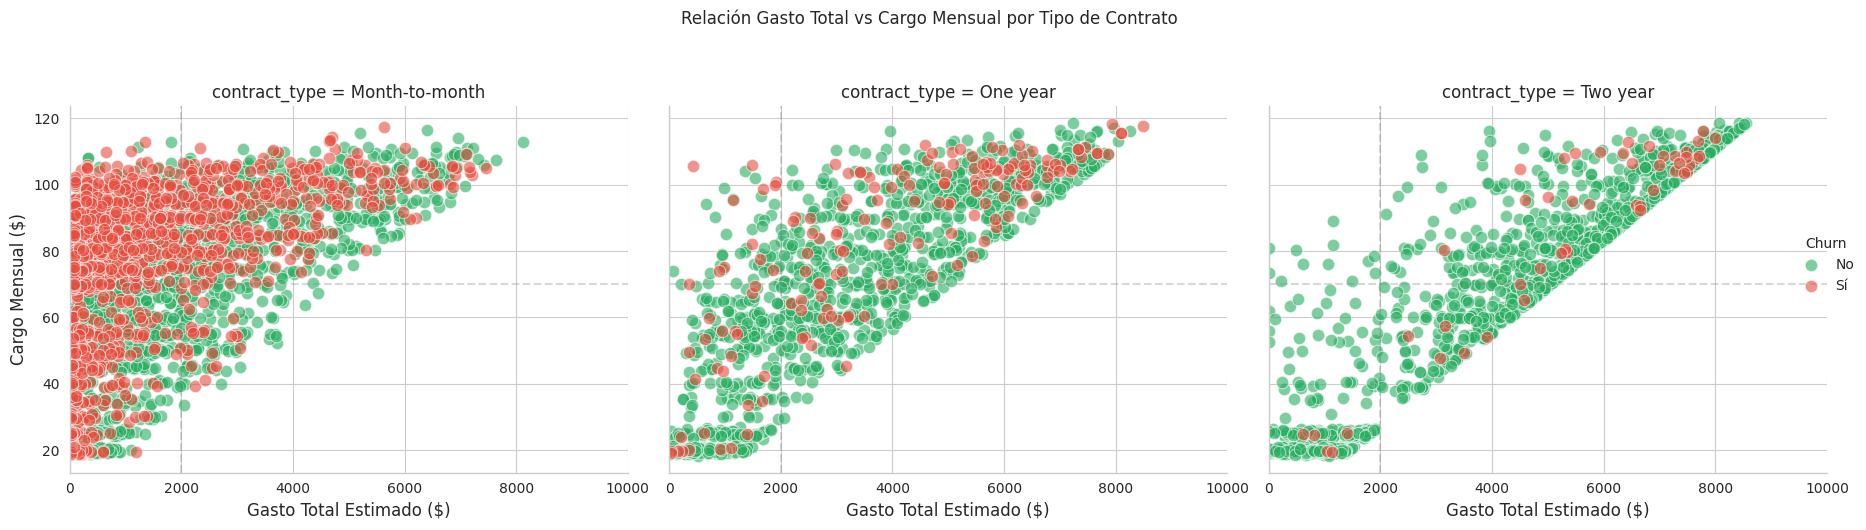

In [29]:
# Versión alternativa con facetas por tipo de contrato
g = sns.FacetGrid(df_clean, col='contract_type', hue='churn',
                 palette={0: "#27ae60", 1: "#e74c3c"},
                 height=5, aspect=1.2, col_order=['Month-to-month', 'One year', 'Two year'])
g.map(sns.scatterplot, 'estimated_total_charges', 'account_charges_monthly', alpha=0.6, s=80)
g.add_legend(title='Churn', labels=['No', 'Sí'])
g.set_axis_labels("Gasto Total Estimado ($)", "Cargo Mensual ($)")
g.fig.suptitle('Relación Gasto Total vs Cargo Mensual por Tipo de Contrato', y=1.05)
g.set(xlim=(0, 10000))

# Añadir líneas de referencia
for ax in g.axes.flat:
    ax.axvline(2000, color='gray', linestyle='--', alpha=0.3)
    ax.axhline(70, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Creacion de modelos predicitivos

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir variables
X = df_clean.drop(['churn', 'contract_type'], axis=1)  # Excluir variables objetivo y temporales
y = df_clean['churn']

# División 80-20 (óptima para este tamaño de dataset)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantener proporción de churn
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 5634 muestras
Tamaño del conjunto de prueba: 1409 muestras


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_auc_score

# Pipeline con normalización y modelo
lr_pipe = make_pipeline(
    StandardScaler(),  # Normalización crucial para regresión logística
    LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
)

# Entrenamiento
lr_pipe.fit(X_train, y_train)

# Evaluación
y_pred_lr = lr_pipe.predict(X_test)
y_proba_lr = lr_pipe.predict_proba(X_test)[:, 1]

print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr):.4f}")

=== Regresión Logística ===
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1035
         1.0       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

AUC-ROC: 0.8433


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Modelo sin necesidad de escalado
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced_subsample',  # Manejo automático del desbalance
    n_estimators=150,
    max_depth=8,
    min_samples_leaf=5
)

# Entrenamiento
rf_model.fit(X_train, y_train)

# Evaluación
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf):.4f}")


=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      1035
         1.0       0.54      0.77      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

AUC-ROC: 0.8459


<Figure size 1000x600 with 0 Axes>

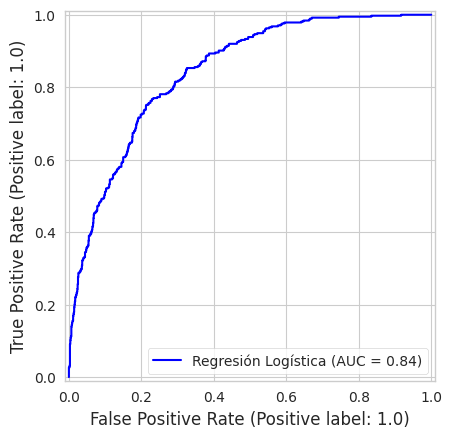

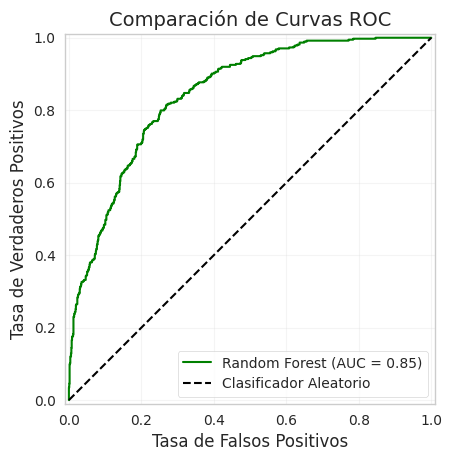

In [33]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 6))

# Curva ROC para ambos modelos
RocCurveDisplay.from_estimator(lr_pipe, X_test, y_test, name='Regresión Logística', color='blue')
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name='Random Forest', color='green')

plt.plot([0, 1], [0, 1], 'k--', label="Clasificador Aleatorio")
plt.title('Comparación de Curvas ROC', fontsize=14)
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.2)
plt.show()

In [34]:
# comparacion entre ambos

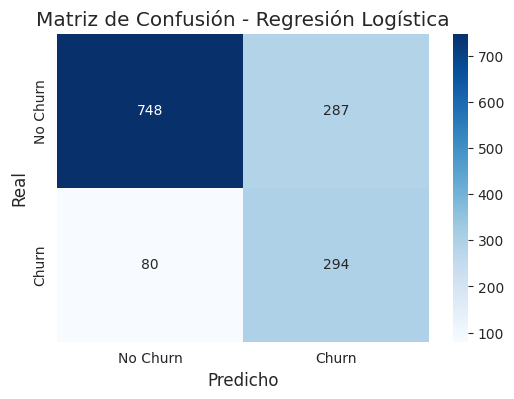


=== Métricas Regresión Logística ===
Accuracy: 0.7395
Precision: 0.5060
Recall: 0.7861
F1-Score: 0.6157
AUC-ROC: 0.8433


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Cálculo de métricas
lr_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'AUC-ROC': roc_auc_score(y_test, y_proba_lr)
}

# Matriz de confusión
lr_cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

print("\n=== Métricas Regresión Logística ===")
for metric, value in lr_metrics.items():
    print(f"{metric}: {value:.4f}")

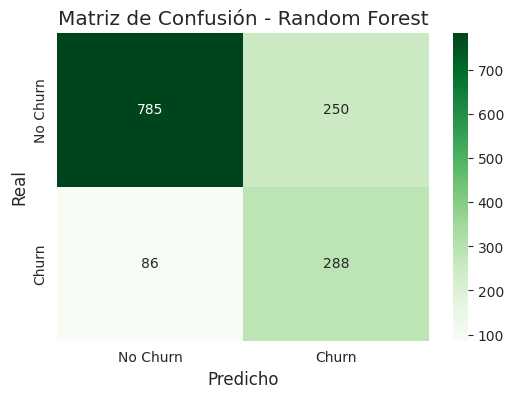


=== Métricas Random Forest ===
Accuracy: 0.7615
Precision: 0.5353
Recall: 0.7701
F1-Score: 0.6316
AUC-ROC: 0.8459


In [36]:
# Cálculo de métricas
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'AUC-ROC': roc_auc_score(y_test, y_proba_rf)
}

# Matriz de confusión
rf_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

print("\n=== Métricas Random Forest ===")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")